In [93]:
import numpy as np
import pandas as pd
import scipy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [94]:
def kmeans(K,X,it):
    idx = np.random.choice(len(X), K, replace=False)
    centroids = X[idx, :]
    distances = scipy.spatial.distance.cdist(X, centroids, 'euclidean')
    points = np.array([np.argmin(i) for i in distances])
    for _ in range(it):
        centroids = [X[points==k].mean(axis=0) for k in range(K)]
        distances = scipy.spatial.distance.cdist(X, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])
    return points, centroids

In [95]:
X, y = make_blobs()
K = 3
it = 50
points,centroids = kmeans(K,X,it)
error = 0
for k, centroid in enumerate(centroids):
    err = np.sum((X[points==k]-centroid)**2)
    print('For k=%i error %.10f' % (k, err))
    error += err
print('Sum of squared errors %.10f' % (error))

For k=0 error 56.6820091738
For k=1 error 70.1419612151
For k=2 error 60.8968551323
Sum of squared errors 187.7208255212


For K=2:
For k=0 error 1717.4294357835
For k=1 error 70.1419612151
Sum of squared errors 1787.5713969987
For K=3:
For k=0 error 23.8146988998
For k=1 error 1728.8405853522
For k=2 error 10.7019631085
Sum of squared errors 1763.3572473605
For K=4:
For k=0 error 16.3343831129
For k=1 error 12.6706143721
For k=2 error 60.8968551323
For k=3 error 70.1419612151
Sum of squared errors 160.0438138324
For K=5:
For k=0 error 15.4033117873
For k=1 error 32.1742353254
For k=2 error 13.6552198977
For k=3 error 60.8968551323
For k=4 error 11.2988257354
Sum of squared errors 133.4284478781
For K=6:
For k=0 error 7.1632405913
For k=1 error 9.4450731242
For k=2 error 18.4198804098
For k=3 error 70.1419612151
For k=4 error 10.4051559149
For k=5 error 5.1366776701
Sum of squared errors 120.7119889256
For K=7:
For k=0 error 6.8533166464
For k=1 error 6.2405310038
For k=2 error 70.1419612151
For k=3 error 19.2519272272
For k=4 error 2.0371614581
For k=5 error 0.7930814181
For k=6 error 13.8588931828
Sum of

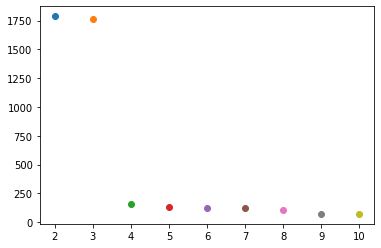

In [96]:
K_list = [2,3,4,5,6,7,8,9,10]
it = 50
for K in K_list:
    points,centroids = kmeans(K,X,it)
    error = 0
    print('For K=%i:' % (K))
    for k, centroid in enumerate(centroids):
        err = np.sum((X[points==k]-centroid)**2)
        print('For k=%i error %.10f' % (k, err))
        error += err
    print('Sum of squared errors %.10f' % (error))
    plt.plot(K, error, 'o')
plt.show()